In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Assignment1_corpus'
with open(path,'r') as f:
  corpus_text=f.read()

In [ ]:
corpus_l=len(corpus_text)

In [ ]:
import os

def divide_to_batch(text, batch_size, output_folder):
    """
    Divides the input text into batches of approximately batch_size characters, ensuring
    that no word is split across batches. Each batch ends at a space and writes each batch
    to a separate text file in the specified output folder.

    Parameters:
    - text (str): The input text corpus to be divided.
    - batch_size (int): The approximate size (in characters) of each batch.
    - output_folder (str): The folder path where batches will be written.

    Returns:
    - None
    """
    os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
    start_idx = 0
    batch_num = 1  # To keep track of batch numbering
    total_batches = 0

    while start_idx < len(text):
        # Determine the end index for the batch
        end_idx = min(start_idx + batch_size, len(text))

        # If the end index is not at the end of the text and not at a space, move backward to find a space
        if end_idx < len(text) and text[end_idx] != ' ':
            end_idx = text.rfind(' ', start_idx, end_idx)
            if end_idx == -1:  # If no space found, take the whole batch size
                end_idx = start_idx + batch_size

        # Extract the batch
        batch = text[start_idx:end_idx]

        # Create a unique filename for each batch
        batch_filename = os.path.join(output_folder, f'batch_{batch_num}.txt')
        with open(batch_filename, 'w') as batch_file:
            batch_file.write(batch)  # Write the batch to the file

        # Move start index directly to the next position without skipping any characters
        start_idx = end_idx
        batch_num += 1  # Increment batch number
        total_batches += 1

    # Verify the sum of characters in all batches matches the original text length
    total_char_count = sum(len(open(os.path.join(output_folder, f'batch_{i+1}.txt')).read())
                           for i in range(total_batches))

    print(f"Original text length: {len(text)}")
    print(f"Total characters across batches: {total_char_count}")
    print(f"Total batches: {total_batches}")

batch_size = 20000
output_folder = '/content/Corpus_batches'  # Specify the output folder
divide_to_batch(corpus_text, batch_size, output_folder)

print(f"Batches written to folder: {output_folder}.")


Original text length: 1386728244
Total characters across batches: 1386728244
Total batches: 69349
Batches written to folder: /content/Corpus_batches.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
from collections import defaultdict
import nltk
import gc


def remove_stopwords_rewrite_and_update_vocab(files, batch_size=100, output_folder='/content/Cleaned_batches'):
    """
    Processes text files in batches, removes stopwords, rewrites cleaned text, and updates vocabulary.

    Args:
        files (list): List of file paths to be processed.
        batch_size (int): Number of files to process in each batch.
        output_folder (str): Folder to save the rewritten text files without stopwords.

    Returns:
        vocab (dict): A dictionary where keys are words and values are their respective frequencies in the corpus.
    """
    stop_words = set(stopwords.words('english'))
    vocab = defaultdict(int)  # To store the vocabulary and frequencies

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process files in batches
    for start in range(0, len(files), batch_size):
        batch_files = files[start:start + batch_size]

        for file_path in batch_files:
            with open(file_path, 'r') as f:
                text = f.read()

            # Tokenize the text
            tokens = word_tokenize(text)

            # Remove stopwords and update vocab
            filtered_tokens = [token for token in tokens if token.lower() not in stop_words and len(token) > 2]

            # Update vocabulary with filtered tokens
            for token in filtered_tokens:
                vocab[token] += 1

            # Join tokens back to a string
            cleaned_text = ' '.join(filtered_tokens)

            # Get the filename and write the cleaned text to a new file
            filename = os.path.basename(file_path)
            output_path = os.path.join(output_folder, filename)

            with open(output_path, 'w') as output_file:
                output_file.write(cleaned_text)

        # Clear tokens to free up memory and force garbage collection
        del tokens, filtered_tokens
        gc.collect()

    print(f"Processed files have been saved in the folder: {output_folder}")

    # Sort vocabulary by frequency in descending order
    sorted_vocab = dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True))

    return sorted_vocab

# Directory containing the original text batches
dir_path = '/content/Corpus_batches'

# List all files in the directory
files = [os.path.join(dir_path, item) for item in os.listdir(dir_path) if item.endswith('.txt')]

# Call the function to remove stopwords, rewrite files, and update vocabulary
vocab = remove_stopwords_rewrite_and_update_vocab(files, batch_size=100)


Processed files have been saved in the folder: /content/Cleaned_batches


In [ ]:
vocab

{'patients': 721822,
 'cells': 483353,
 'also': 476876,
 'may': 449803,
 'covid': 435087,
 'study': 403043,
 'data': 388646,
 'virus': 378508,
 'infection': 369594,
 'using': 356422,
 'used': 346638,
 'disease': 336391,
 'one': 286613,
 'health': 282932,
 'viral': 272957,
 'results': 263215,
 'two': 261520,
 'cell': 255992,
 'cases': 255665,
 'time': 255615,
 'however': 252041,
 'protein': 251704,
 'studies': 245405,
 'number': 239075,
 'sarscov': 232523,
 'clinical': 229545,
 'different': 227171,
 'use': 220232,
 'treatment': 216348,
 'fig': 213942,
 'model': 209354,
 'analysis': 204191,
 'risk': 200813,
 'could': 200142,
 'human': 198974,
 'high': 198821,
 'reported': 197260,
 'first': 192868,
 'group': 191331,
 'respiratory': 188179,
 'found': 187821,
 'figure': 183442,
 'associated': 180316,
 'including': 179698,
 'well': 175538,
 'control': 175119,
 'table': 172380,
 'system': 170797,
 'viruses': 162687,
 'compared': 159557,
 'expression': 158926,
 'due': 158184,
 'based': 157381,

In [ ]:
len(vocab.keys())

2105092

In [ ]:
#choose top 7000 vocabulary items
vocab_7000=dict(list(vocab.items())[:7000])

In [ ]:
dir_path="/content/Cleaned_batches"
txt_files = [os.path.join(dir_path, item) for item in os.listdir(dir_path) if item.endswith('.txt')]

In [ ]:
vocabulary = {word: index for index, word in enumerate(list(vocab_7000.keys()))}  # key as vocab, value as index
matrix_size = len(vocabulary)
window = 10
freq_matrix = np.zeros((matrix_size, matrix_size))

for file_path in txt_files:
    with open(file_path, 'r') as f:
        text = f.read()
        tokens = word_tokenize(text)

        for i, word in enumerate(tokens):
            if word in vocabulary:
                idx = vocabulary[word]

                start = max(0, i - window)
                end = min(len(tokens), i + window + 1)

                for j in range(start, end):
                    if i != j:
                        co_word = tokens[j]
                        if co_word in vocabulary:  # Check if the co-occurring word is in the vocabulary
                            co_word_index = vocabulary[co_word]  # Get its index
                            distance = abs(i - j)
                            value = max(0, window - distance+1)  # Calculate the value based on distance
                            freq_matrix[idx][co_word_index] += value  # Update the frequency matrix


In [ ]:
import pandas as pd
df_freq_matrix = pd.DataFrame(freq_matrix, index=list(vocabulary.keys()), columns=list(vocabulary.keys()))

In [ ]:
df_freq_matrix.iloc[:10, :10]

,patients,cells,also,may,covid,study,data,virus,infection,using
patients,1824812.0,107780.0,269519.0,329302.0,1158690.0,523911.0,217379.0,108692.0,319253.0,116684.0
cells,107780.0,1620690.0,238282.0,149288.0,37238.0,79694.0,75223.0,282772.0,285047.0,167830.0
also,269519.0,238282.0,111568.0,360534.0,174971.0,163739.0,146003.0,176670.0,179643.0,88641.0
may,329302.0,149288.0,360534.0,363952.0,229545.0,128786.0,121164.0,151996.0,220841.0,46452.0
covid,1158690.0,37238.0,174971.0,229545.0,523018.0,233002.0,186758.0,94652.0,279013.0,78005.0
study,523911.0,79694.0,163739.0,128786.0,233002.0,359346.0,240353.0,89649.0,129858.0,122393.0
data,217379.0,75223.0,146003.0,121164.0,186758.0,240353.0,702366.0,55613.0,80880.0,262501.0
virus,108692.0,282772.0,176670.0,151996.0,94652.0,89649.0,55613.0,904564.0,382781.0,83127.0
infection,319253.0,285047.0,179643.0,220841.0,279013.0,129858.0,80880.0,382781.0,401478.0,54909.0
using,116684.0,167830.0,88641.0,46452.0,78005.0,122393.0,262501.0,83127.0,54909.0,204450.0


In [ ]:
pij_matrix = np.zeros((matrix_size, matrix_size)) #p(j|i)=Fij/row_Sum(i)
for i in range(matrix_size):
  row_sum = np.sum(freq_matrix[i])
  for j in range(matrix_size):
    pij_matrix[i][j]=freq_matrix[i][j]/row_sum

In [ ]:
df_pij = pd.DataFrame(pij_matrix, index=list(vocabulary.keys()), columns=list(vocabulary.keys()))

In [ ]:
df_pij.iloc[:10, :10]

,patients,cells,also,may,covid,study,data,virus,infection,using
patients,0.026759,0.001580,0.003952,0.004829,0.016991,0.007683,0.003188,0.001594,0.004682,0.001711
cells,0.002508,0.037707,0.005544,0.003473,0.000866,0.001854,0.001750,0.006579,0.006632,0.003905
also,0.006252,0.005527,0.002588,0.008363,0.004059,0.003798,0.003387,0.004098,0.004167,0.002056
may,0.007923,0.003592,0.008674,0.008757,0.005523,0.003099,0.002915,0.003657,0.005313,0.001118
covid,0.027447,0.000882,0.004145,0.005438,0.012389,0.005519,0.004424,0.002242,0.006609,0.001848
study,0.013970,0.002125,0.004366,0.003434,0.006213,0.009582,0.006409,0.002390,0.003463,0.003264
data,0.005997,0.002075,0.004028,0.003342,0.005152,0.006630,0.019376,0.001534,0.002231,0.007241
virus,0.003092,0.008045,0.005026,0.004324,0.002693,0.002551,0.001582,0.025736,0.010891,0.002365
infection,0.009007,0.008042,0.005068,0.006231,0.007872,0.003664,0.002282,0.010799,0.011327,0.001549
using,0.003784,0.005442,0.002874,0.001506,0.002529,0.003969,0.008512,0.002696,0.001781,0.006630


In [ ]:
#store the closest word k for each  j
closest_words = {}

for j in range(len(vocabulary)):
    column = pij_matrix[:, j]

    column[j] = -1
    k = column.argmax()

    closest_words[list(vocabulary.keys())[j]] = list(vocabulary.keys())[k]

In [ ]:
co_occurrence_matrix = np.zeros((matrix_size, matrix_size))
for j in range(len(vocabulary)):
    j_word = list(vocabulary.keys())[j]
    k_word = closest_words[j_word]

    k_index = vocabulary[k_word]

    # For each word i, calculate pik/pjk and fill the new matrix
    for i in range(len(vocabulary)):
        if pij_matrix[i, k_index] > 0 and pij_matrix[j, k_index] > 0:
            co_occurrence_matrix[i, j] = pij_matrix[i, k_index] / pij_matrix[j, k_index]
        else:
            co_occurrence_matrix[i, j] = 0  # If any probability is zero, set the value to 0


In [ ]:
co_occur_df = pd.DataFrame(co_occurrence_matrix, index=list(vocabulary.keys()), columns=list(vocabulary.keys()))

In [ ]:
co_occur_df.iloc[:30, :30] #co_occurrence matrix in dataframe format

,patients,cells,also,may,covid,study,data,virus,infection,using,...,however,protein,studies,number,sarscov,clinical,different,use,treatment,fig
patients,1.000000,0.009144,0.295983,0.126820,0.518161,0.113168,0.020671,0.017540,0.002876,0.012265,...,0.258788,0.048782,0.112676,0.002479,0.000907,0.063897,0.040044,0.022217,0.187996,0.004077
cells,0.003712,1.000000,0.076688,0.085693,0.015903,0.003238,0.016324,0.041943,0.469171,0.025600,...,0.208666,0.011223,0.003224,0.005187,0.027396,0.009142,0.089233,0.012756,0.015058,0.129191
also,0.048600,0.048135,1.000000,0.239426,0.104288,0.034190,0.075150,0.024786,0.016855,0.006122,...,0.214639,0.019578,0.034041,0.025097,0.080123,0.036579,0.117603,0.026483,0.051991,0.047435
may,0.072667,0.020613,0.102473,1.000000,0.070864,0.027548,0.046737,0.013149,0.014651,0.001112,...,0.290398,0.009741,0.027428,0.018826,0.033826,0.037981,0.100499,0.024130,0.069497,0.010072
covid,0.429579,0.003356,0.421981,0.412008,1.000000,0.068029,0.058587,0.003906,0.004548,0.007170,...,0.341764,0.027522,0.067733,0.033194,0.009410,0.094554,0.052656,0.017183,0.090517,0.005772
study,0.279545,0.016265,0.726495,0.063067,0.076239,1.000000,0.045343,0.016048,0.016623,0.024450,...,0.328043,0.015125,0.995652,0.015082,0.021630,0.042613,0.064616,0.029570,0.051322,0.007585
data,0.099265,0.006068,0.508110,0.039514,0.078491,0.062821,1.000000,0.006730,0.011788,0.233085,...,0.171164,0.010790,0.062548,0.029928,0.012337,0.056527,0.103353,0.019731,0.023624,0.021765
virus,0.028747,0.038296,0.097994,0.124483,0.020001,0.015898,0.027482,1.000000,0.233628,0.011114,...,0.258286,0.004205,0.015828,0.025134,0.023959,0.017801,0.065576,0.019418,0.016886,0.035487
infection,0.144252,0.052687,0.103093,0.339076,0.093913,0.060499,0.020214,0.077462,1.000000,0.011357,...,0.365781,0.014190,0.060236,0.033832,0.010872,0.021539,0.047549,0.014386,0.058846,0.018655
using,0.036035,0.015039,0.079661,0.021272,0.060637,0.101466,0.099853,0.013089,0.063589,1.000000,...,0.057805,0.005557,0.101024,0.032998,0.053378,0.038739,0.069421,0.014084,0.031435,0.055343


In [ ]:
dim=co_occurrence_matrix.shape
print("Vocabulary size: ",len(vocab.keys()),"\nVocabulary size chosen for the matrix: ",len(vocab_7000.keys()),f"\nMatrix Dimensions: {dim[0]}x{dim[1]}",)

Vocabulary size:  2105092 
Vocabulary size chosen for the matrix:  7000 
Matrix Dimensions: 7000x7000


In [ ]:
#NOUNS & VERBS (manually)
print("NOUNS: covid, patients, cells, disease, health","\n VERBS: may,using,found,showed,attracted")

NOUNS: covid, patients, cells, disease, health 
 VERBS: may,using,found,showed,,effects


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def generate_similar_words(vocab, co_occurrence_matrix, top_n=5):
    """
    Generate the top N similar words for each word in the vocabulary using cosine similarity.

    Args:
        vocab (dict): Dictionary where the keys are words and values are their indices.
        co_occurrence_matrix (np.array): Co-occurrence matrix (rows represent words, columns represent contexts).
        top_n (int): The number of top similar words to display for each word.

    Returns:
        similar_words_dict (dict): A dictionary where each word has a list of tuples (similar_word, cosine_similarity).
        cosine_sim_matrix (np.array): Cosine similarity matrix for all words.
    """
    cosine_sim_matrix = cosine_similarity(co_occurrence_matrix)

    word_idx = {index: word for word, index in vocab.items()} #key:index,value:word
    similar_words_dict = {}
    for word, idx in vocab.items():
        similarity_scores = cosine_sim_matrix[idx]

        # Sort by similarity, excluding the word itself (self similarity)
        similar_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]

        similar_words_dict[word] = [(word_idx[i], similarity_scores[i]) for i in similar_indices]

    return similar_words_dict,cosine_sim_matrix
similar_words_dict,cosine_sim_matrix = generate_similar_words(vocabulary, co_occurrence_matrix, top_n=10)


In [ ]:
import itertools
for word, similar_list in itertools.islice(similar_words_dict.items(), 10):
    print(f"\nWord: {word}")
    for similar_word, cosine_sim in similar_list[:5]:
        print(f"  Similar Word: {similar_word}, Cosine Similarity: {cosine_sim:.4f}")



Word: patients
  Similar Word: patient, Cosine Similarity: 0.7648
  Similar Word: hospitalization, Cosine Similarity: 0.7154
  Similar Word: hospitalized, Cosine Similarity: 0.7134
  Similar Word: severe, Cosine Similarity: 0.7037
  Similar Word: covid, Cosine Similarity: 0.6897

Word: cells
  Similar Word: cell, Cosine Similarity: 0.7890
  Similar Word: virusinfected, Cosine Similarity: 0.7217
  Similar Word: tcells, Cosine Similarity: 0.6709
  Similar Word: effector, Cosine Similarity: 0.6490
  Similar Word: maturation, Cosine Similarity: 0.6399

Word: also
  Similar Word: furthermore, Cosine Similarity: 0.8519
  Similar Word: additionally, Cosine Similarity: 0.8472
  Similar Word: addition, Cosine Similarity: 0.8282
  Similar Word: indeed, Cosine Similarity: 0.8030
  Similar Word: moreover, Cosine Similarity: 0.8011

Word: may
  Similar Word: might, Cosine Similarity: 0.9012
  Similar Word: likely, Cosine Similarity: 0.8430
  Similar Word: could, Cosine Similarity: 0.8085
  Similar

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


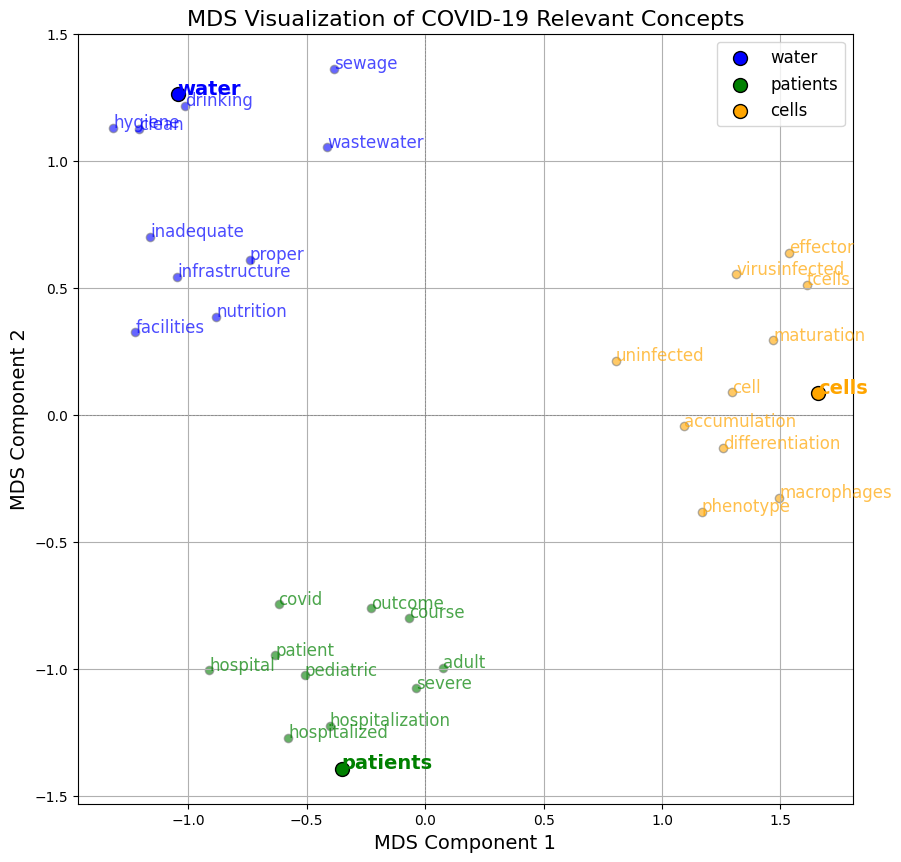

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

concepts = ['water', 'patients', 'cells']
max_similar_words = 10
concept_words = {concept: [word for word, _ in similar_words_dict[concept][:max_similar_words]] for concept in concepts}

all_words = concepts + [word for sublist in concept_words.values() for word in sublist]
submatrix_indices = [list(vocabulary.keys()).index(word) for word in all_words]
submatrix = cosine_sim_matrix[np.ix_(submatrix_indices, submatrix_indices)]

mds = MDS(n_components=2, random_state=42)
coords = mds.fit_transform(submatrix)

plt.figure(figsize=(10, 10))
colors = ['blue', 'green', 'orange']  # Colors for each concept

for i, concept in enumerate(concepts):
    plt.scatter(coords[i, 0], coords[i, 1], color=colors[i], s=100, label=concept, edgecolor='black')
    plt.annotate(concept, (coords[i, 0], coords[i, 1]), fontsize=14, color=colors[i], weight='bold')
    start_idx = len(concepts) + sum([len(concept_words[c]) for c in concepts[:i]])
    end_idx = start_idx + len(concept_words[concept])

    for j in range(start_idx, end_idx):
        word = all_words[j]
        plt.scatter(coords[j, 0], coords[j, 1], color=colors[i], alpha=0.6, edgecolor='grey')
        plt.annotate(word, (coords[j, 0], coords[j, 1]), fontsize=12, color=colors[i], alpha=0.7)

# Add title, labels, and legend
plt.title('MDS Visualization of COVID-19 Relevant Concepts', fontsize=16)
plt.xlabel('MDS Component 1', fontsize=14)
plt.ylabel('MDS Component 2', fontsize=14)
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()